# Simple Machine Learning for Digits recognition

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

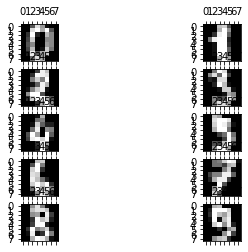

In [ ]:
from sklearn.datasets import *
import matplotlib.pyplot as plt
import numpy
import pandas as pd

digits = load_digits()
print (digits.DESCR)
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(5,2,i+1)
    subplot.matshow(numpy.reshape(digits.data[i],(8,8)),cmap='gray')

plt.show()

In [ ]:
digits.images.shape

(1797, 8, 8)

In [ ]:
digits.data.shape


(1797, 64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target)


KNN : 0.9889 
DT : 0.8444 
SVM : 0.9944 
GaussianNB : 0.8222 
MultinomialNB : 0.9056 


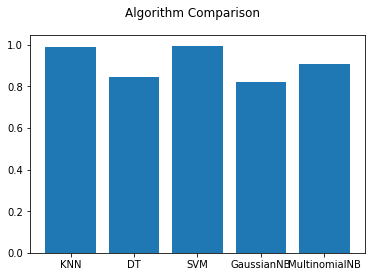

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('GaussianNB',GaussianNB()))
models.append(('MultinomialNB', MultinomialNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
          clf = model
          clf.fit(X_train, y_train) 
          y_preds = clf.predict(X_test)
          accuracy=accuracy_score(y_test, y_preds)
          results.append(accuracy)
          names.append(name)
          msg = "%s : %.4f " % (name, accuracy)
          print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(names,results)

plt.show()

# Select best model

In [ ]:
best_model = SVC()
best_model.fit(X_train, y_train) 

SVC()

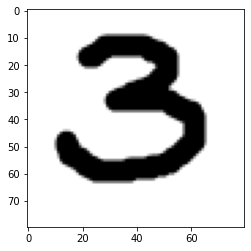

source data in 8x8:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('digitX.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)

predicted = best_model.predict(a.flatten().reshape(1, -1))
print(predicted)